In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as matdates
import datetime as dt
import yfinance as yf

In [2]:
nvda = yf.download('NVDA')
nflx = yf.download('NFLX')
meta = yf.download('META')
tsla = yf.download('TSLA')
apple = yf.download('AAPL')
sbux = yf.download('SBUX')
ford = yf.download('F')
mdn = yf.download('MRNA')
pfzr = yf.download('PFE')
amz = yf.download('AMZN')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
nvda.insert(0, 'Date_mask', nvda.index)
nflx.insert(0, 'Date_mask', nflx.index)
meta.insert(0, 'Date_mask', meta.index)
tsla.insert(0, 'Date_mask', tsla.index)
apple.insert(0, 'Date_mask', apple.index)
sbux.insert(0, 'Date_mask', sbux.index)
ford.insert(0, 'Date_mask', ford.index)
mdn.insert(0, 'Date_mask', mdn.index)
pfzr.insert(0, 'Date_mask', pfzr.index)
amz.insert(0, 'Date_mask', amz.index)

In [4]:
nvda.head()

,Date_mask,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1999-01-22 00:00:00-05:00,1999-01-22 00:00:00-05:00,0.437500,0.488281,0.388021,0.410156,0.376358,271468800
1999-01-25 00:00:00-05:00,1999-01-25 00:00:00-05:00,0.442708,0.458333,0.410156,0.453125,0.415786,51048000
1999-01-26 00:00:00-05:00,1999-01-26 00:00:00-05:00,0.458333,0.467448,0.411458,0.417969,0.383527,34320000
1999-01-27 00:00:00-05:00,1999-01-27 00:00:00-05:00,0.419271,0.429688,0.395833,0.416667,0.382332,24436800
1999-01-28 00:00:00-05:00,1999-01-28 00:00:00-05:00,0.416667,0.419271,0.412760,0.415365,0.381137,22752000


In [5]:
nvda.insert(1, 'Date_str', nvda['Date_mask'].dt.strftime('%Y-%m-%d'))
nflx.insert(1, 'Date_str', nflx['Date_mask'].dt.strftime('%Y-%m-%d'))
meta.insert(1, 'Date_str', meta['Date_mask'].dt.strftime('%Y-%m-%d'))
tsla.insert(1, 'Date_str', tsla['Date_mask'].dt.strftime('%Y-%m-%d'))
apple.insert(1, 'Date_str', apple['Date_mask'].dt.strftime('%Y-%m-%d'))
sbux.insert(1, 'Date_str', sbux['Date_mask'].dt.strftime('%Y-%m-%d'))
ford.insert(1, 'Date_str', ford['Date_mask'].dt.strftime('%Y-%m-%d'))
mdn.insert(1, 'Date_str', mdn['Date_mask'].dt.strftime('%Y-%m-%d'))
pfzr.insert(1, 'Date_str', pfzr['Date_mask'].dt.strftime('%Y-%m-%d'))
amz.insert(1, 'Date_str', amz['Date_mask'].dt.strftime('%Y-%m-%d'))

In [6]:
nvda.drop('Date_mask', axis=1, inplace=True)
nflx.drop('Date_mask', axis=1, inplace=True)
meta.drop('Date_mask', axis=1, inplace=True)
tsla.drop('Date_mask', axis=1, inplace=True)
apple.drop('Date_mask', axis=1, inplace=True)
sbux.drop('Date_mask', axis=1, inplace=True)
ford.drop('Date_mask', axis=1, inplace=True)
mdn.drop('Date_mask', axis=1, inplace=True)
pfzr.drop('Date_mask', axis=1, inplace=True)
amz.drop('Date_mask', axis=1, inplace=True)

In [7]:
amz.head()

,Date_str,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1997-05-15 00:00:00-04:00,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16 00:00:00-04:00,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19 00:00:00-04:00,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20 00:00:00-04:00,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21 00:00:00-04:00,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [8]:
amz.isnull().any()

Date_str     False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
nvda.dropna(subset=['Adj Close'], inplace=True)

<Axes: xlabel='Date'>

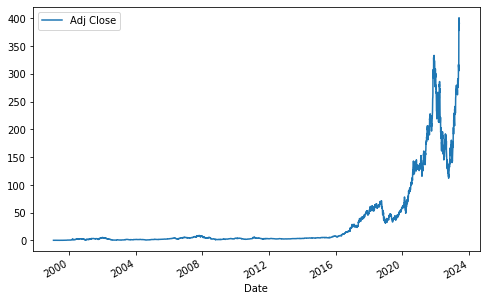

In [10]:
nvda_adj = nvda.loc[:, ['Adj Close']].copy()
nvda_adj.plot(figsize=(8, 5))

<Axes: xlabel='Date'>

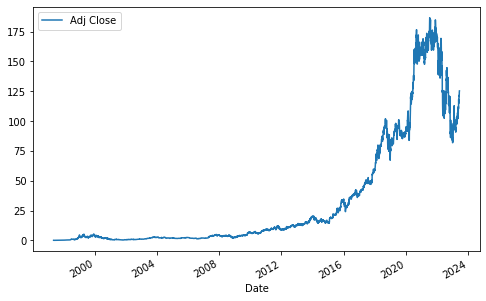

In [11]:
amz_adj = amz.loc[:, ['Adj Close']].copy()
amz_adj.plot(figsize=(8, 5))

<Axes: xlabel='Date'>

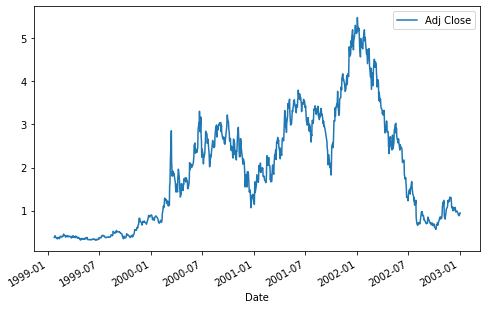

In [12]:
from_date = '1997-01-03'
to_date = '2003-01-03'
nvda_adj.loc[from_date:to_date].plot(figsize=(8,5))

In [13]:
# 일별 수익률 계산
nvda_adj['daily_rtn'] = nvda_adj['Adj Close'].pct_change()
nvda_adj.head(10)

,Adj Close,daily_rtn
Date,,
1999-01-22 00:00:00-05:00,0.376358,NaN
1999-01-25 00:00:00-05:00,0.415786,0.104762
1999-01-26 00:00:00-05:00,0.383527,-0.077586
1999-01-27 00:00:00-05:00,0.382332,-0.003115
1999-01-28 00:00:00-05:00,0.381137,-0.003125
1999-01-29 00:00:00-05:00,0.363215,-0.047023
1999-02-01 00:00:00-05:00,0.370384,0.019738
1999-02-02 00:00:00-05:00,0.341709,-0.077419
1999-02-03 00:00:00-05:00,0.348877,0.020978


In [14]:
amz_adj['daily_rtn'] = amz_adj['Adj Close'].pct_change()
amz_adj.head(10)

,Adj Close,daily_rtn
Date,,
1997-05-15 00:00:00-04:00,0.097917,NaN
1997-05-16 00:00:00-04:00,0.086458,-0.117028
1997-05-19 00:00:00-04:00,0.085417,-0.012040
1997-05-20 00:00:00-04:00,0.081771,-0.042685
1997-05-21 00:00:00-04:00,0.071354,-0.127392
1997-05-22 00:00:00-04:00,0.069792,-0.021891
1997-05-23 00:00:00-04:00,0.075000,0.074622
1997-05-27 00:00:00-04:00,0.079167,0.055560
1997-05-28 00:00:00-04:00,0.076563,-0.032892


In [15]:
# 누적 곱 계산
nvda_adj['st_rtn'] = (1+nvda_adj['daily_rtn']).cumprod()
nvda_adj.tail(10)

,Adj Close,daily_rtn,st_rtn
Date,,,
2023-05-22 00:00:00-04:00,311.760010,-0.002815,828.360842
2023-05-23 00:00:00-04:00,306.880005,-0.015653,815.394443
2023-05-24 00:00:00-04:00,305.380005,-0.004888,811.408873
2023-05-25 00:00:00-04:00,379.799988,0.243696,1009.146228
2023-05-26 00:00:00-04:00,389.459991,0.025434,1034.813307
2023-05-30 00:00:00-04:00,401.109985,0.029913,1065.767882
2023-05-31 00:00:00-04:00,378.339996,-0.056767,1005.266963
2023-06-01 00:00:00-04:00,397.700012,0.051171,1056.707425
2023-06-02 00:00:00-04:00,393.269989,-0.011139,1044.936647


In [16]:
amz_adj['st_rtn'] = (1+amz_adj['daily_rtn']).cumprod()
amz_adj.tail(10)

,Adj Close,daily_rtn,st_rtn
Date,,,
2023-05-22 00:00:00-04:00,115.010002,-0.010667,1174.566260
2023-05-23 00:00:00-04:00,114.989998,-0.000174,1174.361962
2023-05-24 00:00:00-04:00,116.750000,0.015306,1192.336391
2023-05-25 00:00:00-04:00,115.000000,-0.014989,1174.464111
2023-05-26 00:00:00-04:00,120.110001,0.044435,1226.651175
2023-05-30 00:00:00-04:00,121.660004,0.012905,1242.480940
2023-05-31 00:00:00-04:00,120.580002,-0.008877,1231.451171
2023-06-01 00:00:00-04:00,122.769997,0.018162,1253.817000
2023-06-02 00:00:00-04:00,124.250000,0.012055,1268.931877


<Axes: xlabel='Date'>

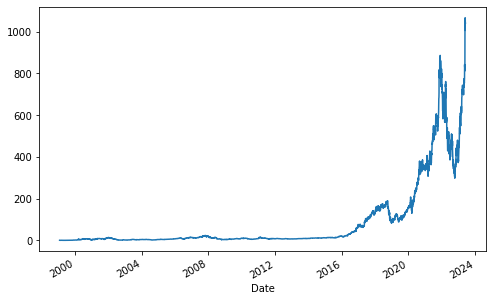

In [17]:
nvda_adj['st_rtn'].plot(figsize=(8,5))

<Axes: xlabel='Date'>

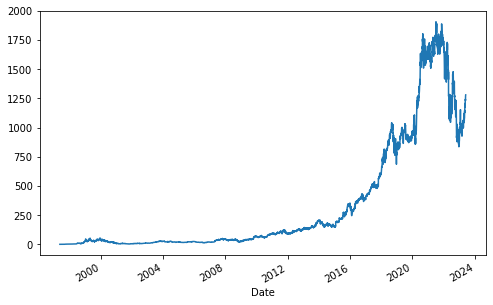

In [18]:
amz_adj['st_rtn'].plot(figsize=(8,5))

In [19]:
base_date = '2012-01-30'

nvda_tmp = nvda_adj.loc[base_date:, ['st_rtn']] / nvda_adj.loc[base_date, ['st_rtn']]
amz_tmp = amz_adj.loc[base_date:, ['st_rtn']] / amz_adj.loc[base_date, ['st_rtn']]

엔비디아 누적 수익:  115.37487416704411


<Axes: xlabel='Date'>

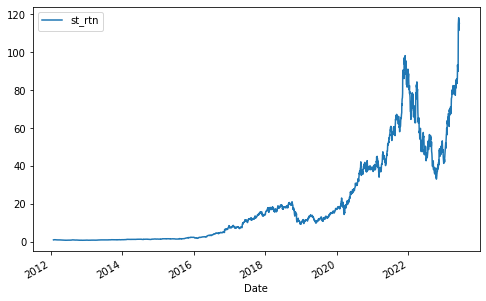

In [20]:
print('엔비디아 누적 수익: ', nvda_tmp.loc[nvda_tmp.index[-1], 'st_rtn'])
nvda_tmp.plot(figsize=(8, 5))

아마존 누적 수익:  13.041894567446283


<Axes: xlabel='Date'>

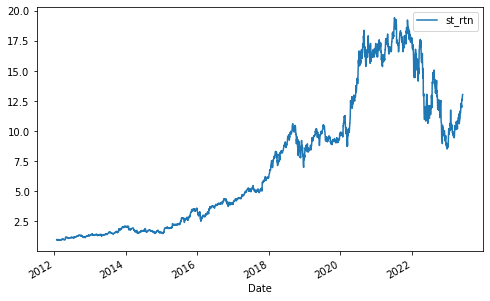

In [21]:
print('아마존 누적 수익: ', amz_tmp.loc[amz_tmp.index[-1], 'st_rtn'])
amz_tmp.plot(figsize=(8, 5))

In [22]:
## 연평균 복리 수익률(CAGR)
# 수익률 성과를 분석할 때는 산술평균 수익률보다 기하평균 수익률을 더 선호
# => 기하평균 수익률이 복리 성질과 주가 변동이 심한 때에 따라 변동성을 표현하기 때문

## CAGR을 파이썬으로 구현
# 마지막 일자의 최종 누적 수익률의 누적 연도 제곱근을 구하는 것
# 일(Day) 데이터를 사용했으므로 전체 연도를 구하기 위해 전체 데이터 기간을 252로 나눈 역수를 제곱(a**b) 연산 후 -1을 하면 수익률이 나온다.
# => 금융공학에서 1년은 252 영업일로 계산

nvda_cagr = nvda_adj.loc[nvda_adj.index[-1], 'st_rtn'] ** (252./len(nvda_adj.index)) -1
print(nvda_cagr)

amz_cagr = amz_adj.loc[amz_adj.index[-1], 'st_rtn'] ** (252./len(amz_adj.index)) -1
print(amz_cagr)

0.3304582541483916
0.3164744957740908


In [23]:
## 최대 낙폭(MDD)
# 최대 낙폭은 투자 기간에 고점부터 저점까지 떨어진 낙폭 중 최댓값을 의미
# => 투자자가 겪을 수 있는 최대 고통을 측정하는 지표로 사용되며, 낮을수록 좋다.

## MDD를 파이썬으로 구현
# 수정 종가에 cummax() 함수 값(누적 최댓값)을 저장한다. 
# 전체의 최댓값이 아닌 행별로 진행하면서 누적 값을 갱신
# 현재 수정 종가에서 누적 최댓값 대비 낙폭률을 계산하고 cummin() 함수를 사용해 최대 하락률을 계산

nvda_historical_max = nvda_adj['Adj Close'].cummax()
nvda_daily_drawdown = nvda_adj['Adj Close'] / nvda_historical_max - 1.0
nvda_historical_dd = nvda_daily_drawdown.cummin()

amz_historical_max = amz_adj['Adj Close'].cummax()
amz_daily_drawdown = amz_adj['Adj Close'] / amz_historical_max - 1.0
amz_historical_dd = amz_daily_drawdown.cummin()

<Axes: xlabel='Date'>

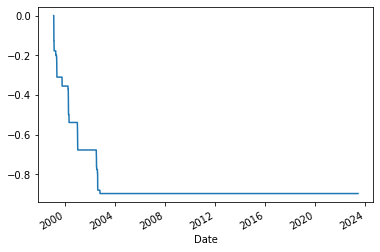

In [24]:
nvda_historical_dd.plot()

<Axes: xlabel='Date'>

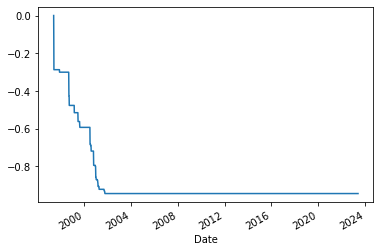

In [25]:
amz_historical_dd.plot()

In [26]:
## 변동성(Vol)
# 여러 종류의 변동성 중 주가 변화 수익률 관점의 변동성을 확인
# 변동성은 금융 자산의 방향성에 대한 불확실성과 가격 등락에 대한 위험 예상 지표로 해석

## 변동성(Vol)을 파이썬으로 구현
# 수익률의 표준 편차로 계산
# 일(Day) 단위 변동성을 의미
# => 루이 바슐리에의 '투기이론'에서 주가의 변동폭은 시간의 제곱근에 비례한다는 연구 결과에 따라, 일 단위 변동성을 연율화할 때 252의 제곱근을 곱한다.

nvda_vol = np.std(nvda_adj['daily_rtn']) * np.sqrt(252.)
print(nvda_vol)

amz_vol = np.std(amz_adj['daily_rtn']) * np.sqrt(252.)
print(amz_vol)

0.6069148651352261
0.5717047779483306


In [27]:
## 샤프 지수
# 위험 대비 수익성 지표

## 샤프 지수를 파이썬으로 구현
# 사후적 샤프 비율(Ex-post Sharpe ratio)를 사용
# => 실현 수익률의 산술평균 / 실현 수익률의 변동성으로 계산
# 넘파이의 평균을 구하는 함수와 연율화 변동성을 활용해 위험 대비 수익성 지표를 계산

nvda_sharpe = np.mean(nvda_adj['daily_rtn']) / np.std(nvda_adj['daily_rtn']) * np.sqrt(252.)
print(nvda_sharpe)

amz_sharpe = np.mean(amz_adj['daily_rtn']) / np.std(amz_adj['daily_rtn']) * np.sqrt(252.)
print(amz_sharpe)

0.7719651862400062
0.7617378457150838


In [28]:
# 성과 분석 결과
print('*엔비디아 성과 분석 결과*')
print('CAGR: ', round(nvda_cagr*100, 2), '%')
print('MDD: ', round(-1*nvda_historical_dd.min()*100, 2), '%')
print('Vol: ', round(nvda_vol*100, 2), '%')
print('Sharpe: ', round(nvda_sharpe, 2))

*엔비디아 성과 분석 결과*
CAGR:  33.05 %
MDD:  89.72 %
Vol:  60.69 %
Sharpe:  0.77


In [29]:
# 상장 후 현재까지 연평균 복리 수익률로 33% 성장
# 최대 낙폭을 살펴보면 89%까지 하락한 경우가 있음을 확인 가능
# 변동성은 60%인 것을 확인 할 수 있는데, 이는 주가 수익률이 꽤 많이 출렁인 것을 의미
# => 장기간의 시점에서 주가를 바라볼 때는 안정적으로 우상향했다고 생각할 수 있으나, 하루하루 주가 흐름은 그닥 안정적이이 않았다는 것을 의미
# 샤프지수는 1이상만 되어도 좋다고 판단한다. (값이 높을수록 수익률이 우수)

In [30]:
print('*아마존 성과 분석 결과*')
print('CAGR: ', round(amz_cagr*100, 2), '%')
print('MDD: ', round(-1*amz_historical_dd.min()*100, 2), '%')
print('Vol: ', round(amz_vol*100, 2), '%')
print('Sharpe: ', round(amz_sharpe, 2))

*아마존 성과 분석 결과*
CAGR:  31.65 %
MDD:  94.4 %
Vol:  57.17 %
Sharpe:  0.76
